# Lab 3.03 - Confidence intervals


In [9]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import math 


## Exercise 3.1 - rlanders

Load the dataset data/rlanders.csv. Use the column Money.  
We assume that the values from this sample are normally distributed around a population mean $\mu$ that is unknown, but that the standard deviation of the population is known, i.e. $\sigma = 98$.


In [48]:
df = pd.read_csv('../data/rlanders.csv').set_index(['ID'])
# Show the first few records of the Data Frame
df.head()

,Gender,Money,Days,Months,Count,Survey
ID,,,,,,
1,Female,440,29,11,35,3
2,Female,503,23,10,52,3
3,Male,412,16,11,55,3
4,Male,587,25,9,28,5
5,Male,525,30,11,41,4


Calculate a 99% confidence interval for the population mean (Answer: [484.191, 516.121]).

In [49]:
n = df['Money'].size
m = df['Money'].mean()
s = 98 / np.sqrt(n)
a = 1 - 0.99

z = stats.norm.isf(a/2)

lo = m - z * s  
hi = m + z * s  

print([lo, hi])

[484.1908445724813, 516.1211554275187]


Calculate a 95% confidence interval for the population mean. (Answer =  [488.008, 512.304])

In [50]:
a = 1 - 0.95

z = stats.norm.isf(a/2)

lo = m - z * s  
hi = m + z * s  

print([lo, hi])

[488.0080173668306, 512.3039826331694]


Suppose σ is unknown, calculate a 95% confidence interval for the population mean. (Answer = [487.319, 512.993])

In [51]:
a = 1 - 0.95
s = df['Money'].std() / np.sqrt(n)

z = stats.norm.isf(a/2)

lo = m - z * s  
hi = m + z * s  

print([lo, hi])

[487.3813176543966, 512.9306823456035]


Finally, suppose the sample consists of only the first 25 observations in this dataset. Calculate a 95% confidence interval for this situation.  
(Answer = [450.291,536.669])

In [53]:
df = df.loc[0:25]

n = df['Money'].size
m = df['Money'].mean()
s = df['Money'].std() / np.sqrt(n)
a = 1 - 0.95

z = stats.t.isf(a/2, df=n-1)

lo = m - z * s  
hi = m + z * s  

print([lo, hi])

[450.29120764817304, 536.6687923518269]


## Exercise 3.2

1. How do you calculate the upper and lower limits of a 95% and 99% confidence interval?
2. A 99% confidence interval is [wider/narrower/the same width] as a 95% confidence interval. Why?
3. What would a 100% confidence interval look like?

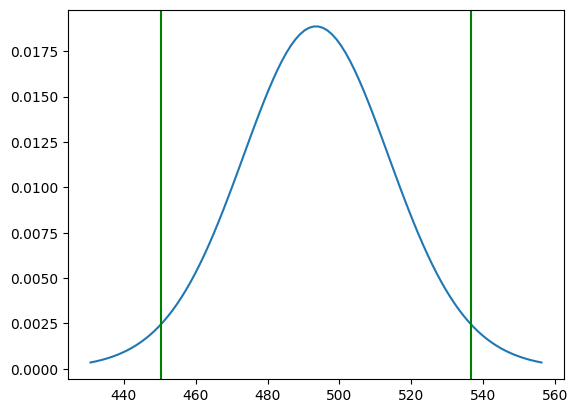

In [98]:
x = np.linspace(m - 3 * s, m + 3 * s, num=100)
z = stats.t.isf(a/2, df=n-1)

plt.plot(x, stats.t.pdf(x, df = n-1, loc=m, scale=s), label="df=n-1") 
 

lo = m - z * s  
hi = m + z * s  
plt.axvline(hi,  color='g') 
plt.axvline(lo, color='g') 